In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import os
import pandas as pd

In [2]:
def Misclassification_error(Actual_label,predicted_label):
    Total_sample  = len(Actual_label)
    bool_array =  Actual_label == predicted_label
    True_count = np.count_nonzero(bool_array)
    #print(True_count)
    return (Total_sample - True_count)/Total_sample

In [3]:
def Train_tree(Train_data,Train_label,Valid_data,Valid_label,name,depth):

    Train_error = []
    Test_eror   = []

    for i in range(1,depth+1):
        Tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = i,random_state=1)
        Tree.fit(Train_data,Train_label)

        prediction = Tree.predict(Train_data)
        temp = Misclassification_error(Train_label,prediction)

        Train_error.append(temp)

        prediction = Tree.predict(Valid_data)
        temp = Misclassification_error(Valid_label,prediction)
        Test_eror.append(temp)

    Depth = np.linspace(1,depth,depth)
    plt.plot(Depth,Train_error,label = 'Training Misclassification_error')
    plt.plot(Depth,Test_eror,label = 'Testing Misclassification_error')
    plt.xlabel("Depth")
    plt.ylabel("Misclassification_error")
    plt.title("Error For %s Dataset" %name)
    plt.legend()
    plt.show()
    return np.array(list(zip(Train_error,Test_eror)))

In [36]:
def Train_forest(Train_data,Train_label,Valid_data,Valid_label,name,max_features=1):
    Train_error = []
    Test_eror   = []
    
    k = [3,10,30,100,300]
    
    for i in k:
        
        Tree = RandomForestClassifier(criterion = 'entropy',n_estimators = i,max_features=max_features)
        Tree.fit(Train_data,Train_label)

        prediction = Tree.predict(Train_data)
        temp = Misclassification_error(Train_label,prediction)

        Train_error.append(temp)

        prediction = Tree.predict(Valid_data)
        temp = Misclassification_error(Valid_label,prediction)
        Test_eror.append(temp)

   
    plt.xticks(np.linspace(0,len(k)-1,len(k)),k) 
    plt.plot(Train_error,label = 'Training Misclassification_error')
    plt.plot(Test_eror,label = 'Testing Misclassification_error')
    plt.xlabel("K")
    plt.ylabel("Misclassification_error")
    plt.title("Error For %s Dataset" %name)
    plt.legend()
    plt.show()
    df = pd.DataFrame(np.array(list(zip(Train_error,Test_eror))),columns=["Train error","Test Error"])
    df.index = k
    df.index.name = 'k'
    
    return df


# Part a

In [5]:
source_folder = "C:\\Users\\18503\\Dropbox\\Course\\Applied Machine Learning\\Homework\\hw1"

In [6]:
os.listdir(os.path.join(source_folder,"MADELON"))

['madelon.param',
 'madelon_test.data',
 'madelon_train.data',
 'madelon_train.labels',
 'madelon_valid.data',
 'madelon_valid.labels']

In [7]:
Train_data  = np.loadtxt(os.path.join(source_folder,"MADELON","madelon_train.data"))
Train_label = np.loadtxt(os.path.join(source_folder,"MADELON","madelon_train.labels"))

Valid_data  = np.loadtxt(os.path.join(source_folder,"MADELON","madelon_valid.data"))
Valid_label = np.loadtxt(os.path.join(source_folder,"MADELON","madelon_valid.labels"))

Test_data   = np.loadtxt(os.path.join(source_folder,"MADELON","madelon_test.data"))
Test_label  = []

Train_data.shape,Train_label.shape,Test_data.shape

((2000, 500), (2000,), (1800, 500))

In [8]:
np.unique(Train_label)

array([-1.,  1.])

In [9]:
Train_df = pd.DataFrame(data=Train_data)

In [10]:
Train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485.0,477.0,537.0,479.0,452.0,471.0,491.0,476.0,475.0,473.0,...,477.0,481.0,477.0,485.0,511.0,485.0,481.0,479.0,475.0,496.0
1,483.0,458.0,460.0,487.0,587.0,475.0,526.0,479.0,485.0,469.0,...,463.0,478.0,487.0,338.0,513.0,486.0,483.0,492.0,510.0,517.0
2,487.0,542.0,499.0,468.0,448.0,471.0,442.0,478.0,480.0,477.0,...,487.0,481.0,492.0,650.0,506.0,501.0,480.0,489.0,499.0,498.0
3,480.0,491.0,510.0,485.0,495.0,472.0,417.0,474.0,502.0,476.0,...,491.0,480.0,474.0,572.0,454.0,469.0,475.0,482.0,494.0,461.0
4,484.0,502.0,528.0,489.0,466.0,481.0,402.0,478.0,487.0,468.0,...,488.0,479.0,452.0,435.0,486.0,508.0,481.0,504.0,495.0,511.0


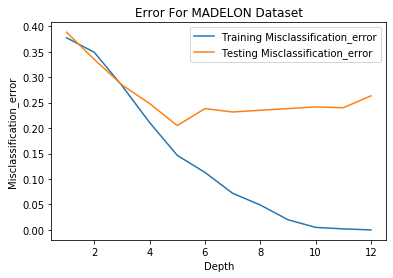

In [11]:
depth = 12
Error     = Train_tree(Train_data,Train_label,Valid_data,Valid_label,'MADELON',depth=depth)
Train_error = Error[:,0]
Test_eror   = Error[:,1]

In [12]:
np.min(Train_error),np.argmin(Train_error)+1

(0.0, 12)

In [13]:
np.min(Test_eror),np.argmin(Test_eror)+1

(0.205, 5)

# Part b

In [14]:
os.listdir(os.path.join(source_folder,"wilt"))

['wilt_test.csv', 'wilt_test.labels', 'wilt_train.csv', 'wilt_train.labels']

In [15]:
Train_data_1  = pd.read_csv(os.path.join(source_folder,"wilt","wilt_train.csv"),delimiter = ',',header = None)
Train_label_1 = np.loadtxt(os.path.join(source_folder,"wilt","wilt_train.labels"))

Valid_data_1  = pd.read_csv(os.path.join(source_folder,"wilt","wilt_test.csv"),delimiter=',',header = None)
Valid_label_1 = np.loadtxt(os.path.join(source_folder,"wilt","wilt_test.labels"))

Train_data_1.shape,Train_label_1.shape,Valid_data_1.shape,Valid_label_1.shape

((4339, 5), (4339,), (500, 5), (500,))

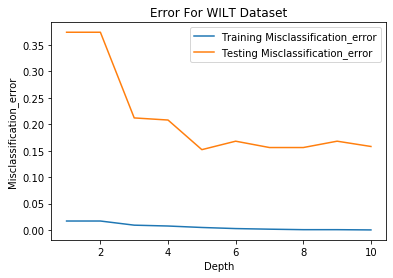

In [16]:
depth = 10
Error_1      = Train_tree(Train_data_1,Train_label_1,Valid_data_1,Valid_label_1,'WILT',depth)
Train_error_1 = Error_1[:,0]
Test_eror_1   = Error_1[:,1]

In [17]:
Train_error_1,Test_eror_1

(array([0.01705462, 0.01705462, 0.00921871, 0.00760544, 0.00483982,
        0.00276561, 0.00161327, 0.0006914 , 0.0006914 , 0.00023047]),
 array([0.374, 0.374, 0.212, 0.208, 0.152, 0.168, 0.156, 0.156, 0.168,
        0.158]))

In [18]:
np.min(Train_error_1),np.argmin(Train_error_1)+1

(0.00023046784973496196, 10)

In [19]:
np.min(Test_eror_1),np.argmin(Test_eror_1)+1

(0.152, 5)

In [25]:
np.unique(Train_label_1,return_counts=True)

(array([0., 1.]), array([4265,   74], dtype=int64))

# Part C

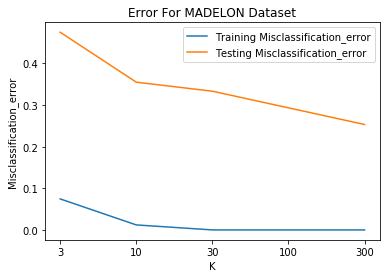

,Train error,Test Error
k,,
3,0.0745,0.475000
10,0.0120,0.355000
30,0.0000,0.333333
100,0.0000,0.293333
300,0.0000,0.253333


In [37]:
max_features = int(np.sqrt(500))
Train_forest(Train_data,Train_label,Valid_data,Valid_label,"MADELON",max_features=max_features)

# Part D

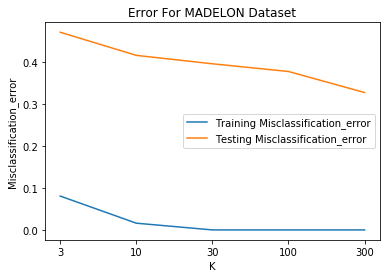

,Train error,Test Error
k,,
3,0.0805,0.470000
10,0.0160,0.415000
30,0.0000,0.395000
100,0.0000,0.376667
300,0.0000,0.326667


In [38]:
max_features = int(np.log(500))
Train_forest(Train_data,Train_label,Valid_data,Valid_label,"MADELON",max_features=max_features)

# Part E

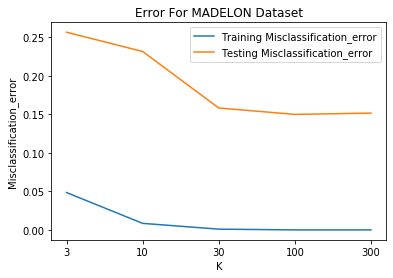

,Train error,Test Error
k,,
3,0.0485,0.256667
10,0.0085,0.231667
30,0.0010,0.158333
100,0.0000,0.150000
300,0.0000,0.151667


In [39]:
max_features = 500
Train_forest(Train_data,Train_label,Valid_data,Valid_label,"MADELON",max_features=max_features)